data science end of year project part 2
Fasion mnist-2 3.8.21

In [1]:
# all imports that i wuill need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# importing the data set
training_set=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_train.csv")
testing_set_dont_touch=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_test.csv")

the labels represnt
<br>0= t-shirt
<br>1= pants
<br>2= pull over = sweater?
<br>3= dress
<br>4= coat
<br>5= sandel
<br>6= shirt
<br>7= shoe
<br>8= bag
<br>9= boot

In [3]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# spliting the training set so that i can train and test the models
train_set, test_set = train_test_split(training_set, test_size=0.2, random_state=42)

In [5]:
# changing the the data into a numpy array wuth the data type  being float 32, so tha i cab see the pictures

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

# dividing the data intu x,y groups.
# x is all the features
# y is the classification

x_train_set=train_set[:, 1:]
y_train_set=train_set[:, 0]
x_test_set=test_set[:, 1:]
y_test_set=test_set[:, 0]


testing_set_dont_touch=np.array(testing_set_dont_touch,dtype='float32')

x_testing_set_dont_touch=testing_set_dont_touch[:, 1:]
y_testing_set_dont_touch=testing_set_dont_touch[:, 0]

In [6]:
x_train_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

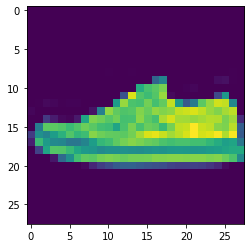

In [7]:
image1=x_train_set[1, :].reshape((28,28))
plt.imshow(image1)

In [8]:
# pca lowers the amount of featues,
# here we are making are data set containe the features that represnt 90% of the varience.

In [9]:
pca=PCA(n_components=0.9)
x_train_reduced=pca.fit_transform(x_train_set)
x_train_recovered=pca.inverse_transform(x_train_reduced)

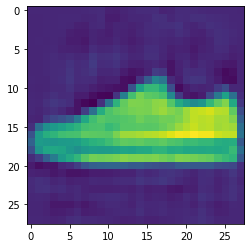

In [10]:
image1=x_train_recovered[1, :].reshape((28,28))
plt.imshow(image1)

In [11]:
# function to represent the confussion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [12]:
# here we are making are data set containe the features that represnt 90% of the varience.
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_train_recovered1=pca1.inverse_transform(x_train_reduced1)
x_test_reduced1=pca1.transform(x_test_set)
x_test_recovered1=pca1.inverse_transform(x_test_reduced1)

In [13]:
# this data set has 84 features
pca1.n_components_

84

## KNN1

for x in range (3,50):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(x_train_reduced1, y_train_set)
    y_pred_knn1=knn1.predict(x_test_reduced1)
    accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
    if (accuracy_knn1>0.85):
        print(x, accuracy_knn1)
    else:
        print(x)   

In [ ]:
# the best result is with  5 neighbors

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.8615833333333334

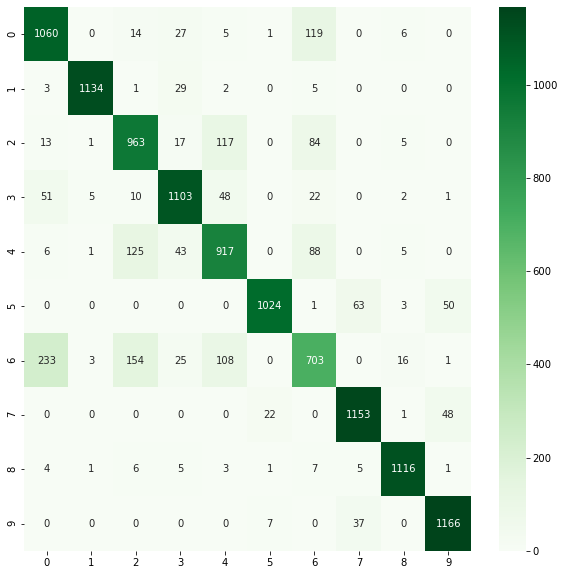

In [15]:
# confussion matrix
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)

In [16]:
# precision score, recalll score, f1 score
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1, average='weighted')) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8607751454082296
recall_score_knn: 0.8615833333333334
f1_score_knn: 0.8600781609884743


In [17]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.85885417 0.8640625  0.86072917 0.8521875  0.8534375 ] mean: 0.8578541666666666


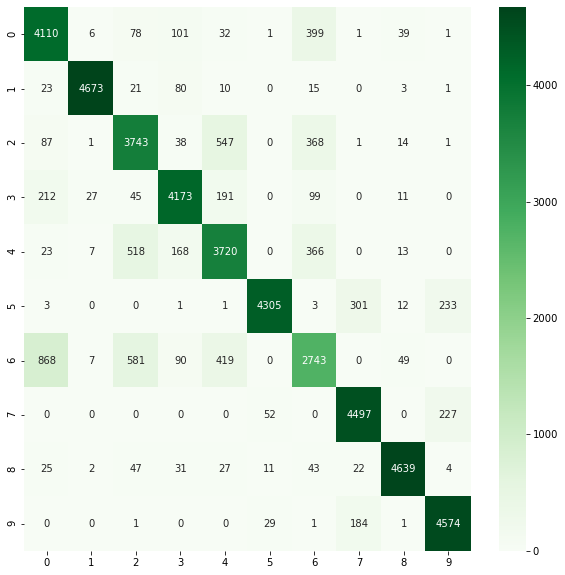

In [18]:
# confussion matrix
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [19]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8583256850602045
recall_score: 0.8578541666666667
f1_score: 0.8569793134465262


## XG1

In [20]:
arr=np.arange(25,525,25)
arr

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

for x in arr:
    XG1 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(x_train_reduced1, y_train_set)
    y_pred_XG1=XG1.predict(x_test_reduced1)
    accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
    if (accuracy_XG1>0.85):
        print(x, accuracy_XG1)
    else:
        print(x)  

In [21]:
XG1=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.8609166666666667

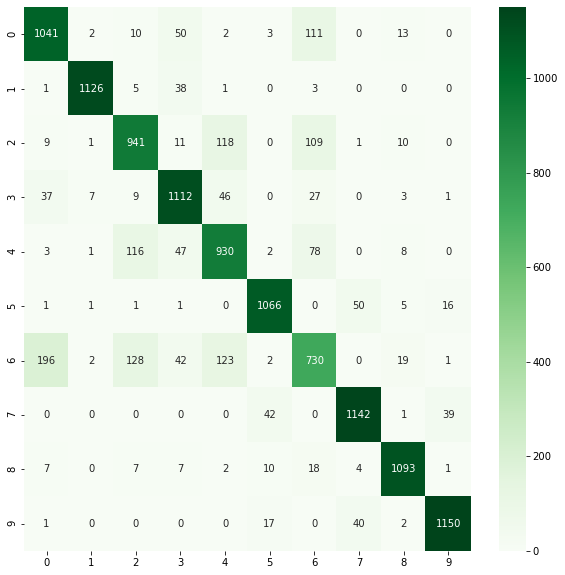

In [22]:
# confussion matrix
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [23]:
# precision score, recalll score, f1 score
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1, average='weighted')) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1,average='weighted'))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1,average='weighted'))

precision_score_XG1: 0.8594411703455085
recall_score_XG1: 0.8609166666666667
f1_score_XG1: 0.8596786174870202


In [24]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.86395833 0.8640625  0.86208333 0.85479167 0.8640625 ] mean: 0.8617916666666666


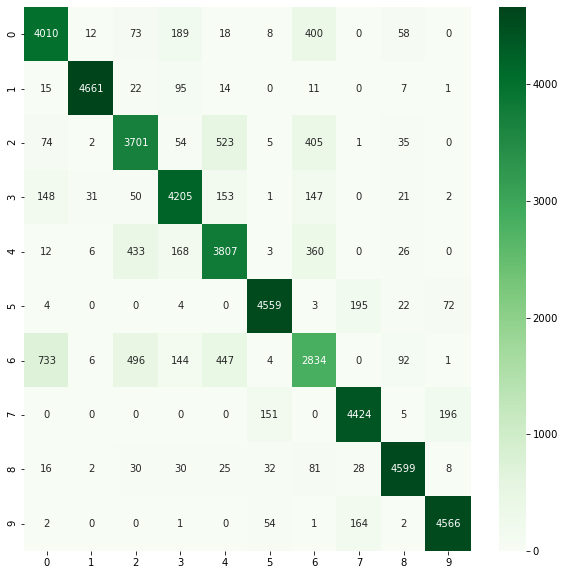

In [25]:
# confussion matrix
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [26]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c,average='weighted'))

precision_score: 0.8605854782858353
recall_score: 0.8617916666666666
f1_score: 0.8608730772924114


## Random  Forest1

In [27]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(x_train_reduced1, y_train_set)
y_pred_forest1=forest1.predict(x_test_reduced1)
accuracy_forest1=metrics.accuracy_score(y_test_set, y_pred_forest1)
accuracy_forest1

0.86625

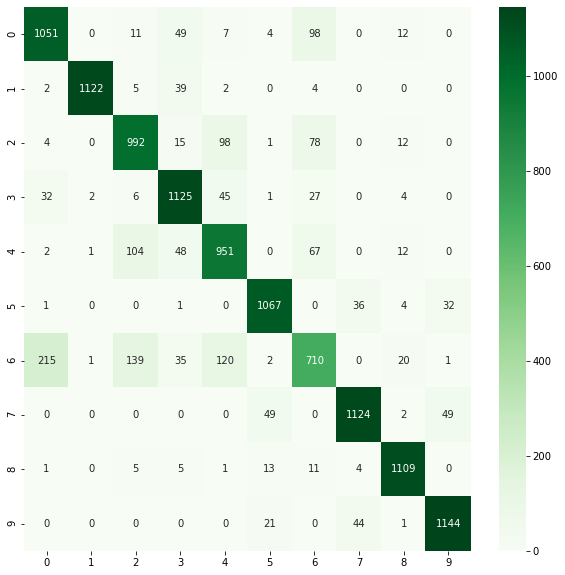

In [28]:
mat_forest1=confusion_matrix(y_test_set, y_pred_forest1)
confussion_matrix(mat_forest1)

In [29]:
# precision score, recalll score, f1 score
print("precision_score_forest1:",precision_score(y_test_set, y_pred_forest1, average='weighted')) 
print("recall_score_forest1:",recall_score(y_test_set, y_pred_forest1,average='weighted'))
print("f1_score_forest1:",f1_score(y_test_set,y_pred_forest1,average='weighted'))

precision_score_forest1: 0.8645379927952666
recall_score_forest1: 0.86625
f1_score_forest1: 0.8642840601128841


In [30]:
#cross validation
cv_scores_forest1=cross_val_score(forest1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[0.86395833 0.86625    0.86447917 0.86416667 0.86270833] mean: 0.8643124999999999


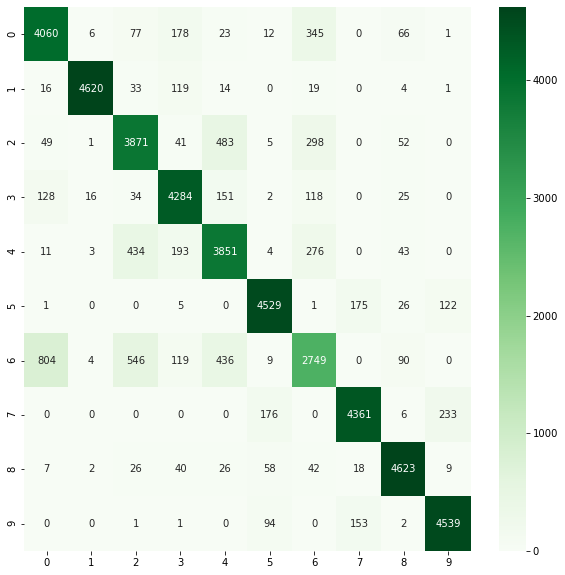

In [31]:
# confussion matrix
y_pred_forest1_c = cross_val_predict(forest1,  x_train_reduced1, y_train_set, cv=5)
cofussion_forest1=confusion_matrix(y_train_set, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [32]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest1_c,average='weighted'))

precision_score: 0.8629031612661485
recall_score: 0.8643125
f1_score: 0.8626445693968018


# VOTE1

In [82]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('XG1',XG1),('forest1',forest1)], voting='soft', )
vote1.fit(x_train_reduced1, y_train_set)
vote1.fit(x_train_reduced1, y_train_set)
y_pred_vote1=vote1.predict(x_test_reduced1)
accuracy_vote1=metrics.accuracy_score(y_test_set, y_pred_vote1)
accuracy_vote1

0.876

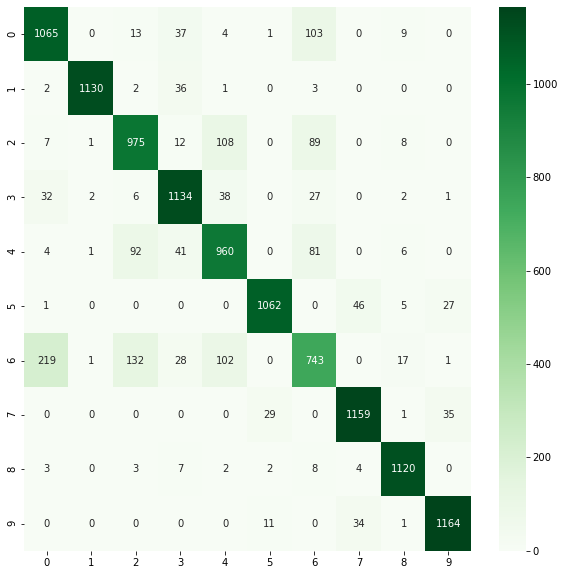

In [83]:
# confussion matrix
mat_vote1=confusion_matrix(y_test_set, y_pred_vote1)
confussion_matrix(mat_vote1)

In [84]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote1,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote1,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote1,average='weighted'))

precision_score: 0.8746313053545388
recall_score: 0.876
f1_score: 0.8745982360659329


In [111]:
#cross validation
cv_scores_vote1=cross_val_score(vote1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[0.8771875  0.87760417 0.87635417 0.868125   0.8734375 ] mean: 0.8745416666666668


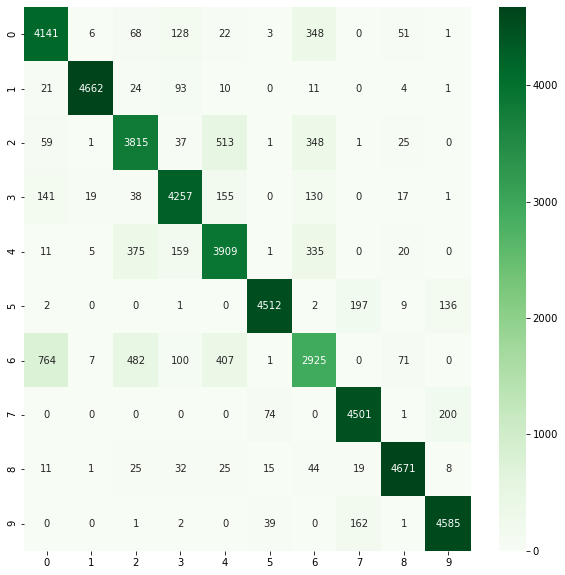

In [112]:
# confussion matrix
y_pred_vote1_c = cross_val_predict(vote1,  x_train_reduced1, y_train_set, cv=5)
cofussion_vote1=confusion_matrix(y_train_set, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [113]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote1_c,average='weighted'))

precision_score: 0.8738849055944802
recall_score: 0.8745416666666667
f1_score: 0.8736370489140325


# PCA 0.8

In [37]:
# here we are making are data set contane the features that represnt 80% of the varience.

In [38]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [39]:
# this data set has 24 features
pca2.n_components_

24

## KNN2

for x in range (3,50):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train_reduced2, y_train_set)
    y_pred_knn2=knn2.predict(x_test_reduced2)
    accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
    if (accuracy_knn2>0.84):
        print(x, accuracy_knn2)
    else:
        print(x)   

In [ ]:
# the best result is with  6 neighbors

In [40]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.8475833333333334

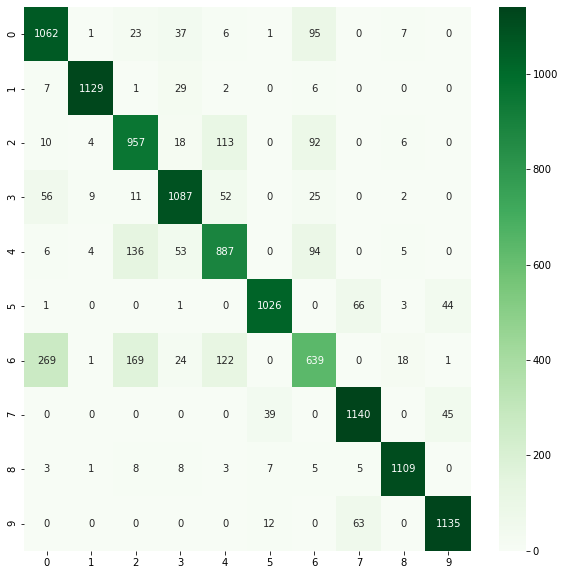

In [41]:
# confussion matrix
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [42]:
# precision score, recalll score, f1 score
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2, average='weighted')) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2,average='weighted'))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2,average='weighted'))

precision_score_knn2: 0.8461738041414596
recall_score_knn2: 0.8475833333333334
f1_score_knn2: 0.8451984578638929


In [43]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.85260417 0.85177083 0.85020833 0.84208333 0.84416667] mean: 0.8481666666666665


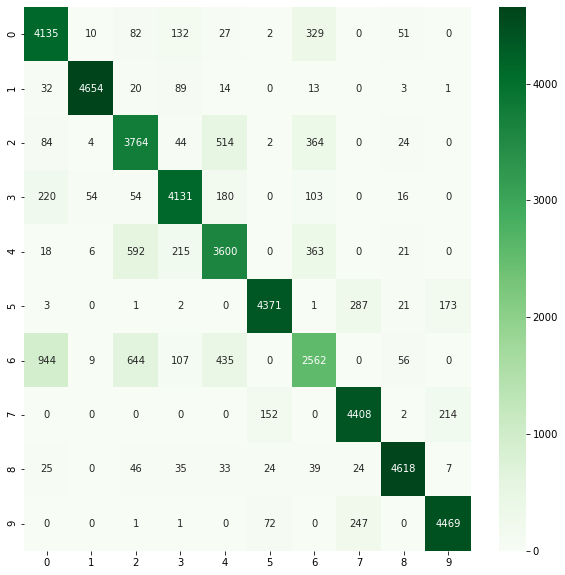

In [44]:
# confussion matrix
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [45]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8583256850602045
recall_score: 0.8578541666666667
f1_score: 0.8569793134465262


## XG2

for x in arr:
    XG2 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.84):
        print(x, accuracy_XG2)
    else:
        print(x)  

In [46]:
XG2=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.8429166666666666

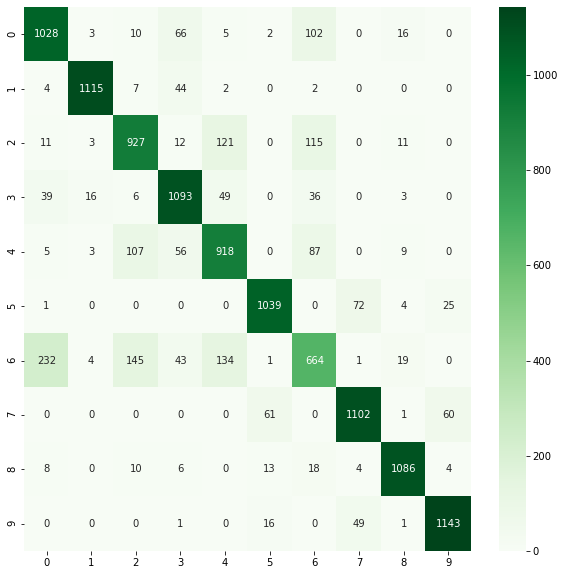

In [47]:
# confussion matrix
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [48]:
# precision score, recalll score, f1 score
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2, average='weighted')) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2,average='weighted'))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2,average='weighted'))

precision_score_XG2: 0.8406534328834173
recall_score_XG2: 0.8429166666666666
f1_score_XG2: 0.8409614692062595


In [49]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.850625   0.84833333 0.85270833 0.8434375  0.84302083] mean: 0.8476250000000001


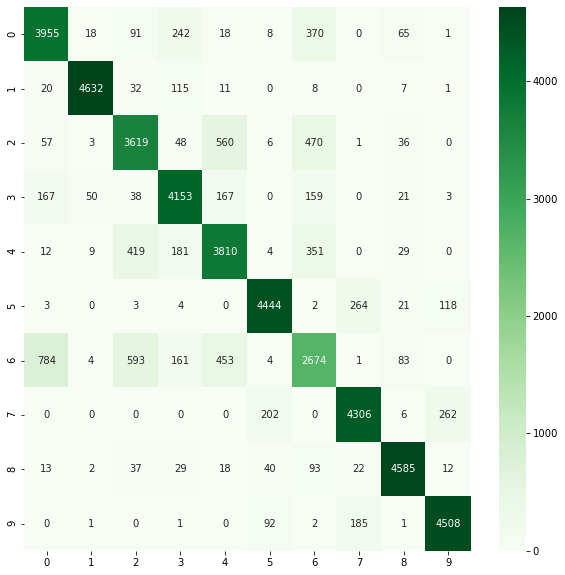

In [50]:
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [51]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c,average='weighted'))

precision_score: 0.8460271667657744
recall_score: 0.847625
f1_score: 0.846379950673067


## Random forest2

In [52]:
forest2= RandomForestClassifier(random_state=42)
forest2.fit(x_train_reduced2, y_train_set)
y_pred_forest2=forest2.predict(x_test_reduced2)
accuracy_forest2=metrics.accuracy_score(y_test_set, y_pred_forest2)
accuracy_forest2

0.8555

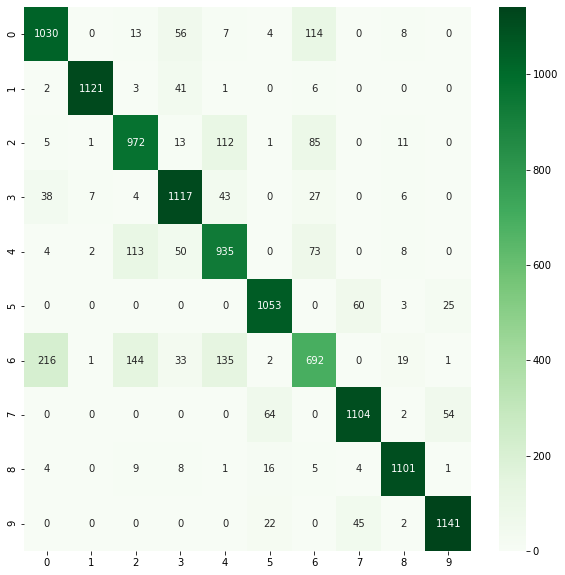

In [53]:
# confussion matrix
mat_forest2=confusion_matrix(y_test_set, y_pred_forest2)
confussion_matrix(mat_forest2)

In [54]:
# precision score, recalll score, f1 score
print("precision_score_forest2:",precision_score(y_test_set, y_pred_forest2, average='weighted')) 
print("recall_score_forest2:",recall_score(y_test_set, y_pred_forest2,average='weighted'))
print("f1_score_forest2:",f1_score(y_test_set,y_pred_forest2,average='weighted'))

precision_score_forest2: 0.8536575753329788
recall_score_forest2: 0.8555
f1_score_forest2: 0.8535756022404357


In [55]:
#cross validation
cv_scores_forest2=cross_val_score(forest2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest2, "mean:", np.mean(cv_scores_forest2))

[0.86010417 0.855625   0.8578125  0.85489583 0.856875  ] mean: 0.8570625


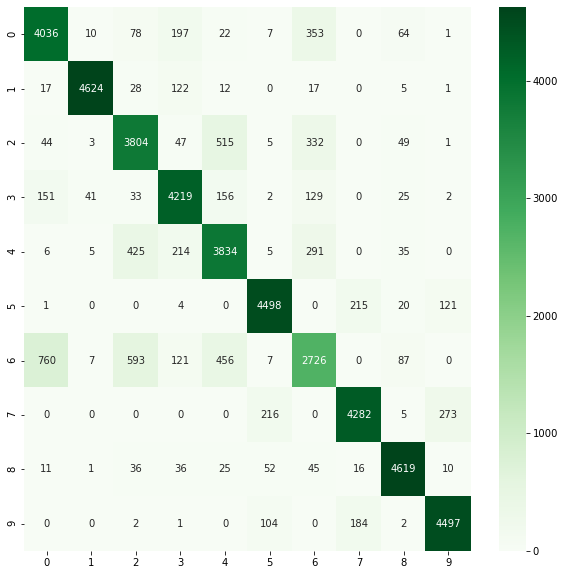

In [56]:
# confussion matrix
y_pred_forest2_c = cross_val_predict(forest2,  x_train_reduced2, y_train_set, cv=5)
cofussion_forest2=confusion_matrix(y_train_set, y_pred_forest2_c)
confussion_matrix(cofussion_forest2)

In [57]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest2_c,average='weighted'))

precision_score: 0.8555108752531416
recall_score: 0.8570625
f1_score: 0.8554526411838127


## VOTE2

In [104]:
vote2=VotingClassifier(estimators=[('knn2',knn2),('XG2',XG2),('forest2',forest2)], voting='soft',weights=[0.3,0.3,0.4,])
vote2.fit(x_train_reduced2, y_train_set)
y_pred_vote2=vote2.predict(x_test_reduced2)
accuracy_vote2=metrics.accuracy_score(y_test_set, y_pred_vote2)
accuracy_vote2

0.85925

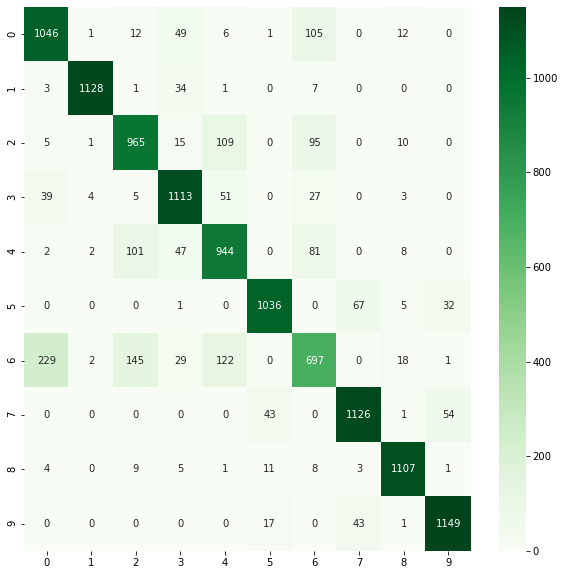

In [105]:
# confussion matrix
mat_vote2=confusion_matrix(y_test_set, y_pred_vote2)
confussion_matrix(mat_vote2)

In [106]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote2,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote2,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote2,average='weighted'))

precision_score: 0.8574490264744761
recall_score: 0.85925
f1_score: 0.8574566346588632


In [107]:
#cross validation
cv_scores_vote2=cross_val_score(vote2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote2, "mean:", np.mean(cv_scores_vote2))

[0.865      0.8621875  0.861875   0.8553125  0.85739583] mean: 0.8603541666666666


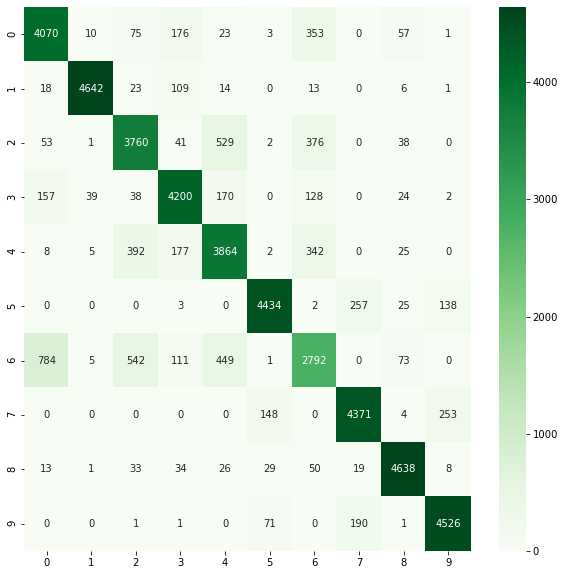

In [108]:
# confussion matrix
y_pred_vote2_c = cross_val_predict(vote2,  x_train_reduced2, y_train_set, cv=5)
cofussion_vote2=confusion_matrix(y_train_set, y_pred_vote2_c)
confussion_matrix(cofussion_vote2)

In [109]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote2_c,average='weighted'))

precision_score: 0.8592509624152483
recall_score: 0.8603541666666666
f1_score: 0.8591723209992862


# PCA 0.7

In [58]:
# here we are making are data set containe the features that represnt 70% of the varience.

pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [59]:
# this data set has 9 features
pca3.n_components_

9

## KNN3

for x in range (3,50):
    knn3 = KNeighborsClassifier(n_neighbors=x)
    knn3.fit(x_train_reduced3, y_train_set)
    y_pred_knn3=knn3.predict(x_test_reduced3)
    accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
    if (accuracy_knn3>0.80):
        print(x, accuracy_knn3)
    else:
        print(x)   

In [114]:
# the best result is with  8 neighbors

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.8115833333333333

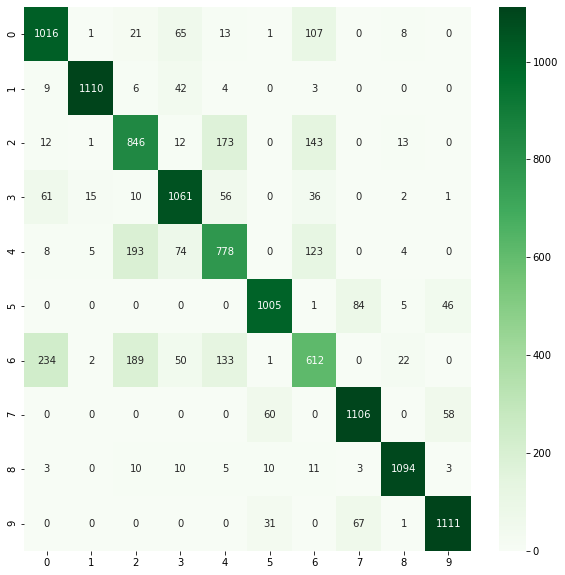

In [61]:
# confussion matrix
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [62]:
# precision score, recalll score, f1 score
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3, average='weighted')) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3,average='weighted'))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3,average='weighted'))

precision_score_knn3: 0.8095074502340963
recall_score_knn3: 0.8115833333333333
f1_score_knn3: 0.8097275034784572


In [63]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.8084375 0.8059375 0.808125  0.8046875 0.8065625] mean: 0.8067499999999999


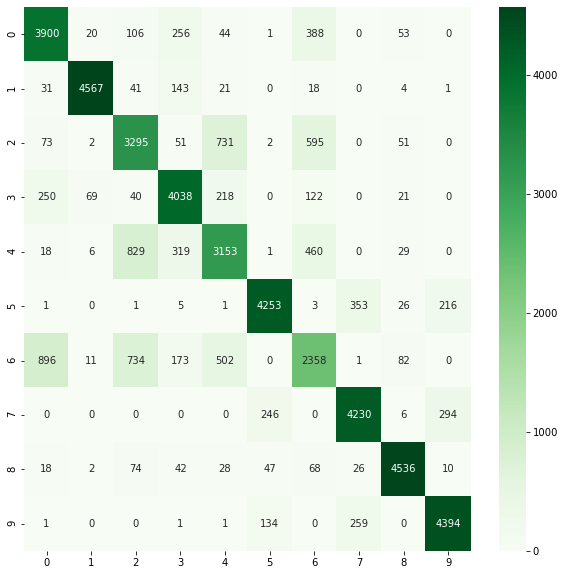

In [64]:
# confussion matrix
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
confussion_matrix(cofussion_knn3)

In [65]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c,average='weighted'))

precision_score: 0.8052835650734805
recall_score: 0.80675
f1_score: 0.8052700291601997


## XG3

for x in arr:
    XG3 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG3.fit(x_train_reduced3, y_train_set)
    y_pred_XG3=XG3.predict(x_test_reduced3)
    accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
    print(x, accuracy_XG3)

In [66]:
XG3=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_reduced3, y_train_set)
y_pred_XG3=XG3.predict(x_test_reduced3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.79775

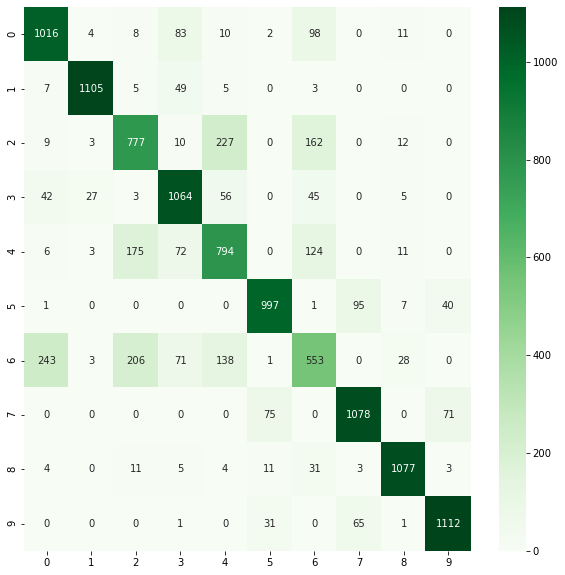

In [67]:
# confussion matrix
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [68]:
# precision score, recalll score, f1 score
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3, average='weighted')) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3,average='weighted'))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3,average='weighted'))

precision_score_XG3: 0.7941118834555203
recall_score_XG3: 0.79775
f1_score_XG3: 0.7950816503409053


In [69]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.801875   0.79729167 0.80072917 0.79614583 0.79614583] mean: 0.7984375


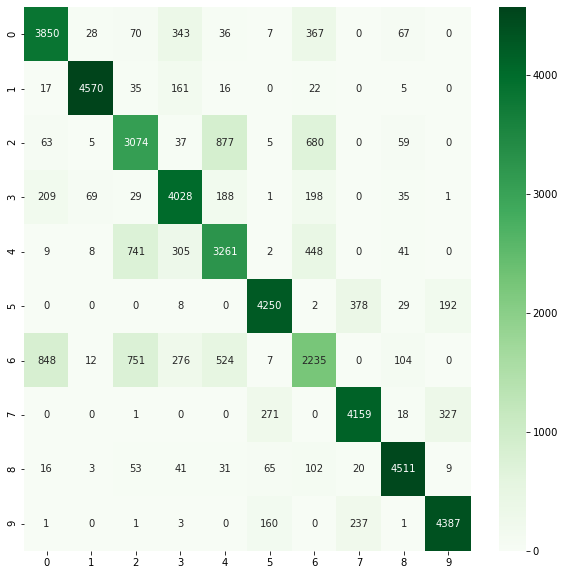

In [70]:
# confussion matrix
y_pred_xg3_c = cross_val_predict(XG3,  x_train_reduced3, y_train_set, cv=5)
cofussion_xg3=confusion_matrix(y_train_set, y_pred_xg3_c)
confussion_matrix(cofussion_xg3)

In [71]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg3_c,average='weighted'))

precision_score: 0.7957222344585545
recall_score: 0.7984375
f1_score: 0.7964956196551071


## Random forest3

In [72]:
forest3= RandomForestClassifier(random_state=42)
forest3.fit(x_train_reduced3, y_train_set)
y_pred_forest3=forest3.predict(x_test_reduced3)
accuracy_forest3=metrics.accuracy_score(y_test_set, y_pred_forest3)
accuracy_forest3

0.81625

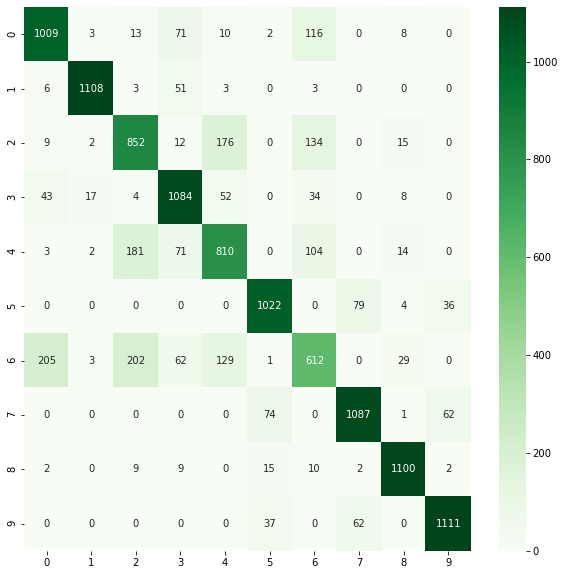

In [73]:
# confussion matrix
mat_forest3=confusion_matrix(y_test_set, y_pred_forest3)
confussion_matrix(mat_forest3)

In [74]:
# precision score, recalll score, f1 score
print("precision_score_forest3:",precision_score(y_test_set, y_pred_forest3, average='weighted')) 
print("recall_score_forest3:",recall_score(y_test_set, y_pred_forest3,average='weighted'))
print("f1_score_forest3:",f1_score(y_test_set,y_pred_forest3,average='weighted'))

precision_score_forest3: 0.8133017467489501
recall_score_forest3: 0.81625
f1_score_forest3: 0.8138903339421892


In [75]:
# crossss validation
cv_scores_forest3=cross_val_score(forest3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest3, "mean:", np.mean(cv_scores_forest3))


[0.82333333 0.8146875  0.81895833 0.81760417 0.8165625 ] mean: 0.8182291666666666


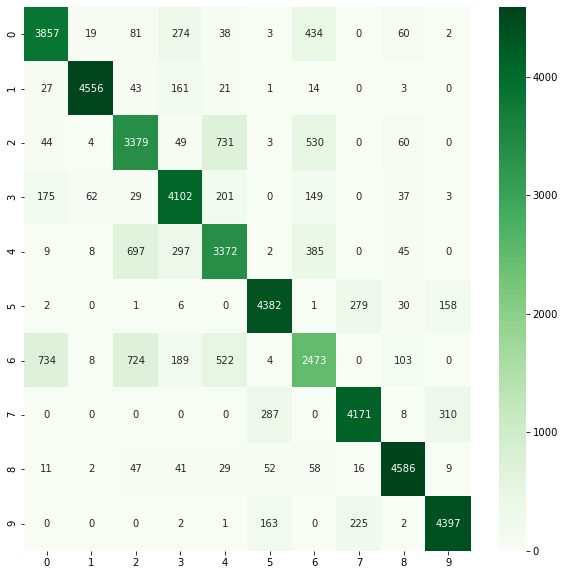

In [76]:
# confussion matrix
y_pred_forest3_c = cross_val_predict(forest3,  x_train_reduced3, y_train_set, cv=5)
cofussion_forest3=confusion_matrix(y_train_set, y_pred_forest3_c)
confussion_matrix(cofussion_forest3)

In [77]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest3_c,average='weighted'))

precision_score: 0.8164818041453654
recall_score: 0.8182291666666667
f1_score: 0.8167798659281227


## VOTE3

In [95]:
vote3=VotingClassifier(estimators=[('knn3',knn1),('XG3',XG1),('forest3',forest1)], voting='soft',weights=[0.35,0.3,0.4,])
vote3.fit(x_train_reduced3, y_train_set)
y_pred_vote3=vote3.predict(x_test_reduced3)
accuracy_vote3=metrics.accuracy_score(y_test_set, y_pred_vote3)
accuracy_vote3

0.8206666666666667

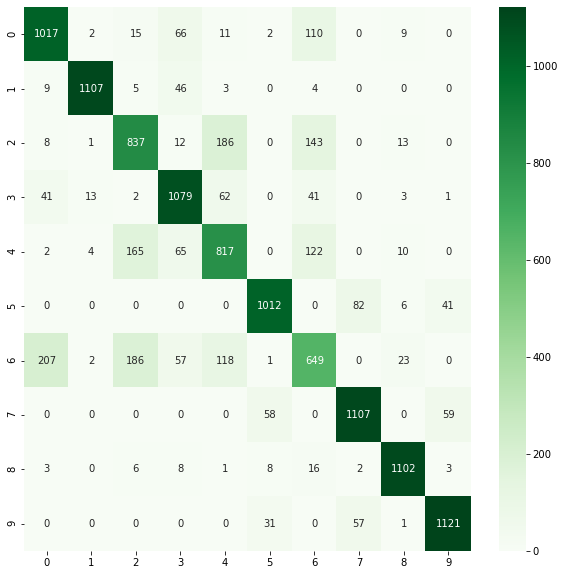

In [96]:
# confussion matrix
mat_vote3=confusion_matrix(y_test_set, y_pred_vote3)
confussion_matrix(mat_vote3)

In [97]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote3,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote3,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote3,average='weighted'))

precision_score: 0.8186675889743001
recall_score: 0.8206666666666667
f1_score: 0.8191790926944398


In [98]:
#cross validation
cv_scores_vote3=cross_val_score(vote1, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote3, "mean:", np.mean(cv_scores_vote3))

[0.82145833 0.8178125  0.82010417 0.81635417 0.81885417] mean: 0.8189166666666665


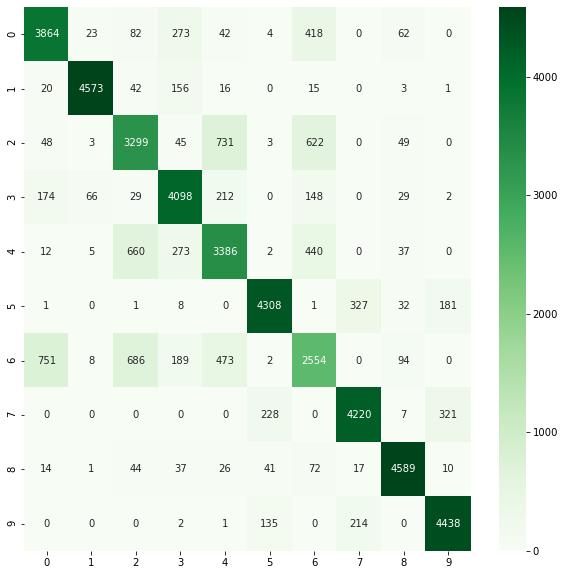

In [99]:
# confussion matrix
y_pred_vote3_c = cross_val_predict(vote3,  x_train_reduced3, y_train_set, cv=5)
cofussion_vote3=confusion_matrix(y_train_set, y_pred_vote3_c)
confussion_matrix(cofussion_vote3)

In [100]:
# precision score, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote3_c,average='weighted'))

precision_score: 0.8179371712783886
recall_score: 0.8193541666666667
f1_score: 0.818306639890436


# testing data

In [78]:
x_testing_set_dont_touch_reduced1=pca1.transform(x_testing_set_dont_touch)

In [79]:
y_pred_knn1_test=knn1.predict(x_testing_set_dont_touch_reduced1)
accuracy_knn1_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_knn1_test)
accuracy_knn1_test

0.8641

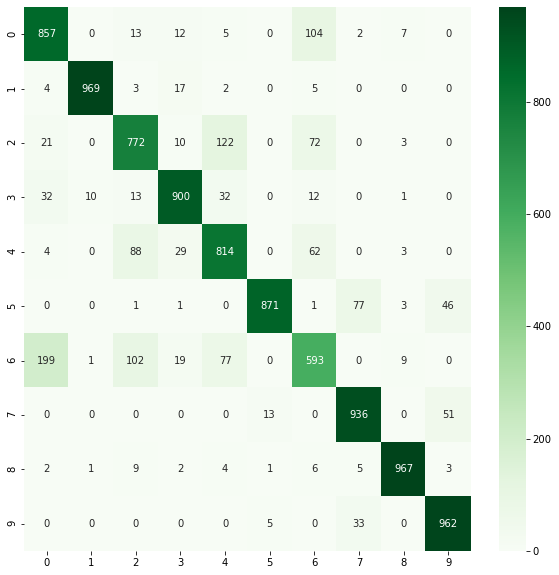

In [80]:
# confussion matrix
mat_knn1_test=confusion_matrix(y_testing_set_dont_touch, y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [ ]:
throughout the whole note book the labels that got cnfused the most are the shirt,t-shoute, pull over, coat.